# Регрессия - пора творить!

Если вы дошли до этой практики и выполнили все предыдущие - вау! Аплодисменты вам!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/leo.png" width=500/></p>



Тем не менее, не время расслабляться! На этот раз, мы не будем рассказывать вам новый материал - лишь дадим пару напутствий и пожелаем успехов и сил!

В этот раз вам предлагается разработать модель предсказания цены домов по набору данных Boston Houses Pricing. Мы его уже немного пощупали в прошлой практике, но в этой вам предстоит сделать всё самостоятельно и на полных данных!

Что надо будет сделать:
- Загрузить данные
- Посмотреть и размер, и примеры данных
- Проверить количество пропусков в данных
    - Убедиться, что пропусков в данных нет и можно строить **baseline**
- Делим данные на train и test 
    - Делаем это один раз! Все дальнейшие модификации и улучшения должны делаться на основе единственного разделения!
    - И не забудьте зафиксировать сид! Переменную `RANDOM_SEED` мы даём ниже
- Создаем baseline модель, снимаем метрики на тестовой выборке
- Производим анализ данных, готовим план по очистке и предобработке данных
- Создаем функцию очистки
- Производим очистку train и test выборок -> обучаем модель с очищенными данными
    - Снимаем метрики и так мы оцениваем влияние очистки данных на обучение
- Создаем класс предобработки данных
- Производим предобработку очищенных данных -> обучаем модель
    - Снимаем метрики и так мы оцениваем влияние предобработки данных на обучение

А дальше можете пофантазировать, почитать интернет и посмотреть, как улучшить метрики! 

**Ваша цель - достигнуть наилучших показателей!**

Вот вам пара идей по интересной организации предобработке:
- По признаку `CRIM` создать признак `is_CRIM`, который будет равен 1, если `CRIM` не равен 0 и 0, если `CRIM` равен нулю
- Сделать обучение модели [Lasso](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html), посмотреть, какие признаки имеют веса близкие к 0 и убрать их из обучения как незначимые
- Оставить только признаки с высокой корреляцией с целевой переменной
- Посмотреть, какие переменные коррелирцют между собой и оставить только единственные из пар коррелирующих
- Посмотреть, в каких примерах данных модель ошибается сильнее всего (отсортировать записи из теста по величине ошибки) и проанализировать, есть ли какая-то зависимость или шум
- Комбинировать разные подходы в зависимости от того, помогает это предсказаниям или нет

Ещё большим плюсом будет, если вы покажете, как влияет каждый этап предобработки на результаты обучения!

In [1]:
# Зафиксируем состояние случайных чисел
import numpy as np
import random

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

In [2]:
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = TEXT_COLOR
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['lines.markersize'] = 15
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

sns.set_style('darkgrid')

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Что мы ждем от вас? 

Готовый ноутбук с таким же названием, в котором будут обязательные пункты с выводами по анализу данных и анализу поведения модели, а также дополнительные пункты по вашим размышлениям и процессу улучшения модели.

Успехов вам, мы в вас верим и уверены, что вы точно справитесь!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/cat-computer-peek-out-36960208.jpg" width=600/></p>

## Этап 1. Загрузка данных. Проверка пропусков и размерность

In [3]:
df_src = pd.read_csv('boston.csv')
print(df_src.head()) # смотрим структуру данных
print('--------------------------------')
print(df_src.isnull().sum()) # смотрим количество пропусков
print('--------------------------------')


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
--------------------------------
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
--------------------------------


In [4]:
print(df_src.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


Видим, что у нас 506 примеров данных, без провалов и всего 13 изначальных фич

## Разделим данные



In [5]:
from sklearn.model_selection import train_test_split


df_train_data, df_test_data = train_test_split(df_src, test_size=.3, random_state=RANDOM_SEED, shuffle=True)

Поиграемся с train данными.

In [6]:
x_train= df_train_data.copy()
y_train = x_train.pop('MEDV')

x_test = df_test_data.copy()
y_test = x_test.pop('MEDV')


print(x_test.head())
print('---------------------------')
print(y_test)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
173  0.09178   0.0   4.05     0  0.510  6.416  84.1  2.6463    5  296.0   
274  0.05644  40.0   6.41     1  0.447  6.758  32.9  4.0776    4  254.0   
491  0.10574   0.0  27.74     0  0.609  5.983  98.8  1.8681    4  711.0   
72   0.09164   0.0  10.81     0  0.413  6.065   7.8  5.2873    4  305.0   
452  5.09017   0.0  18.10     0  0.713  6.297  91.8  2.3682   24  666.0   

     PTRATIO       B  LSTAT  
173     16.6  395.50   9.04  
274     17.6  396.90   3.53  
491     20.1  390.11  18.07  
72      19.2  390.91   5.52  
452     20.2  385.09  17.27  
---------------------------
173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
441    17.1
23     14.5
225    50.0
433    14.3
447    12.6
Name: MEDV, Length: 152, dtype: float64


Посмотрим что будет при обучении модели сейчас

In [7]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def pred_metrics(y_true, y_pred):
    metrics_dict = {
        'mse': mean_squared_error(y_true, y_pred),
        'mae': mean_absolute_error(y_true, y_pred),
        'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
        'r2':r2_score(y_true, y_pred)
    }
    return metrics_dict

In [8]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()
reg_model.fit(x_train, y_train)
y_true = y_test
y_pred = reg_model.predict(x_test)
print(pred_metrics(y_true, y_pred))

{'mse': 21.517444231177663, 'mae': 3.16270987145746, 'rmse': 4.638689926172869, 'r2': 0.7112260057484872}


r2 всего 0.71 ну штож будем улучшать. Посмотрим на корреляционные графики наших фич.

Графики корреляции


<AxesSubplot:>

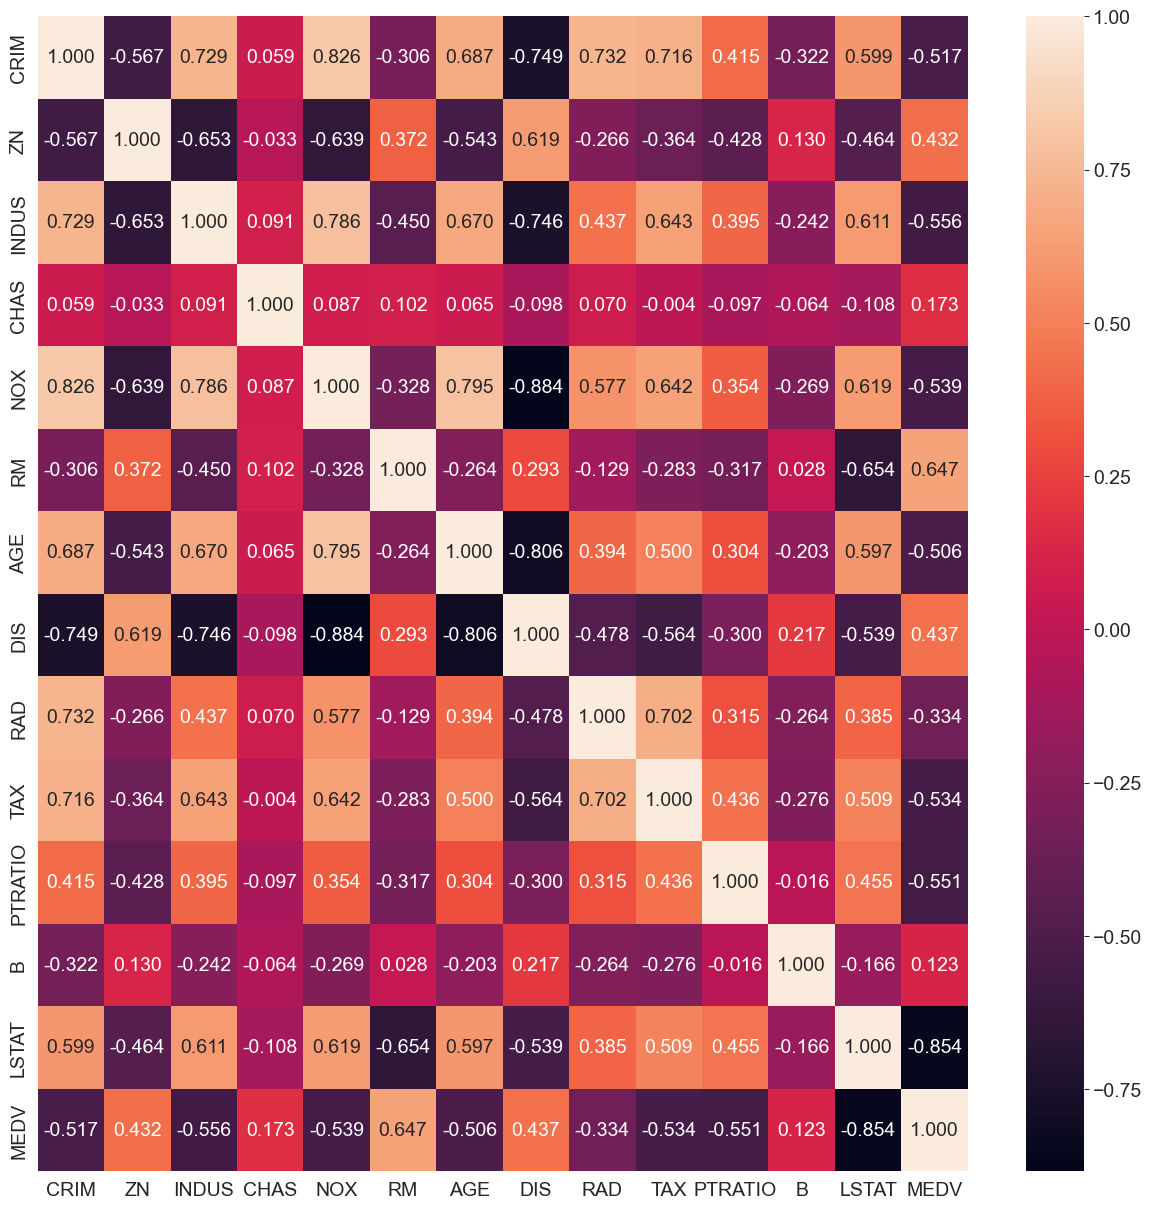

In [9]:
ALL_FEATURES = df_train_data.columns 


corr_matrix = df_train_data.corr(method = "spearman")
plt.figure(figsize=(15, 15))
sns.heatmap(corr_matrix, annot = True, fmt = '.3f')

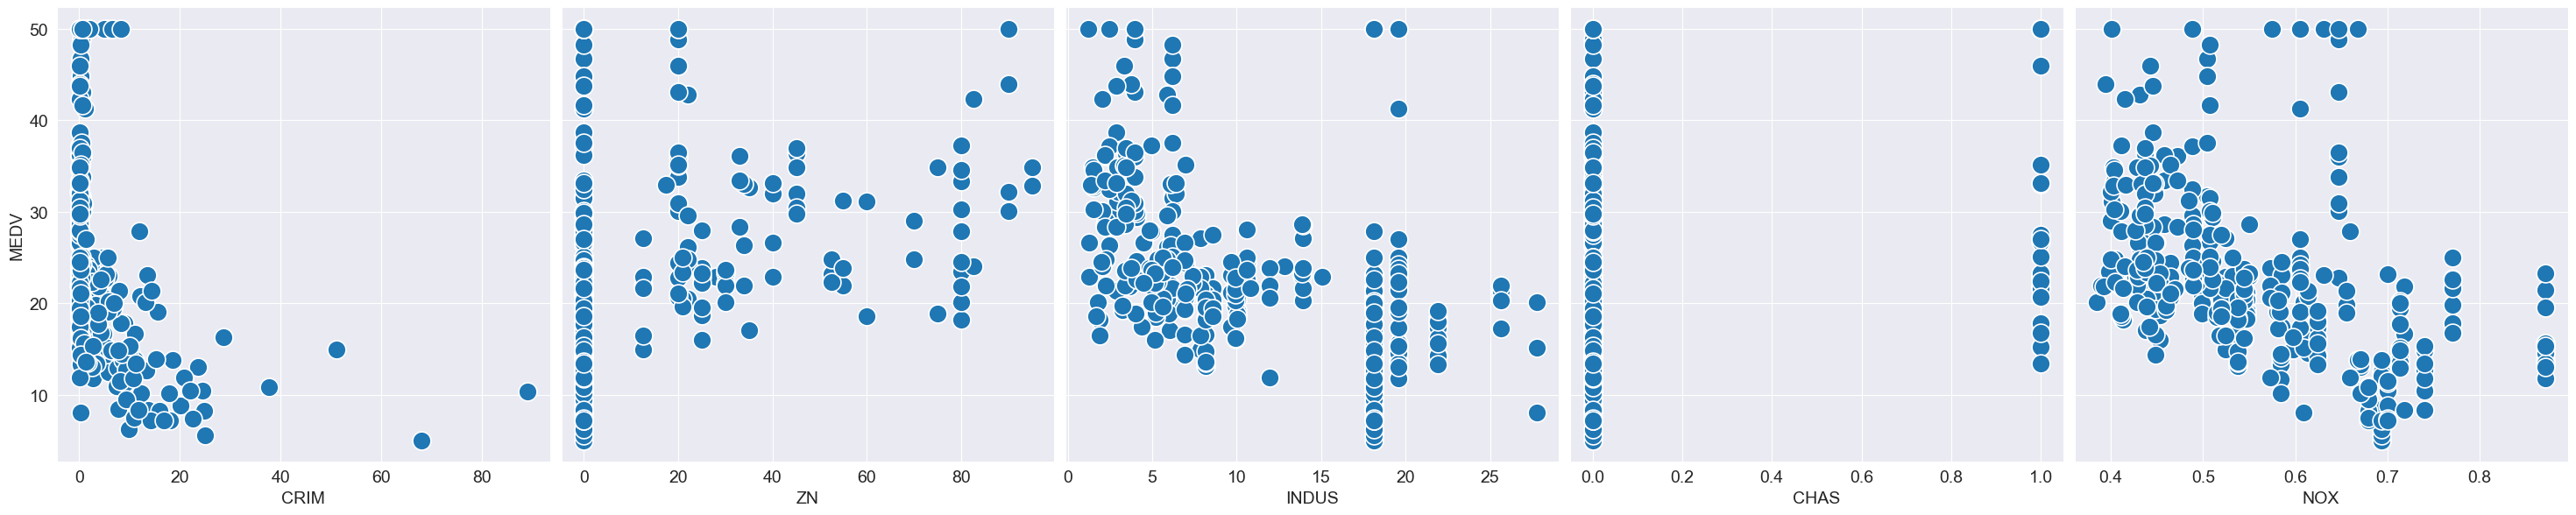

In [10]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = 'MEDV',
            x_vars = list(feat[0:5]),
            height = 6
            )



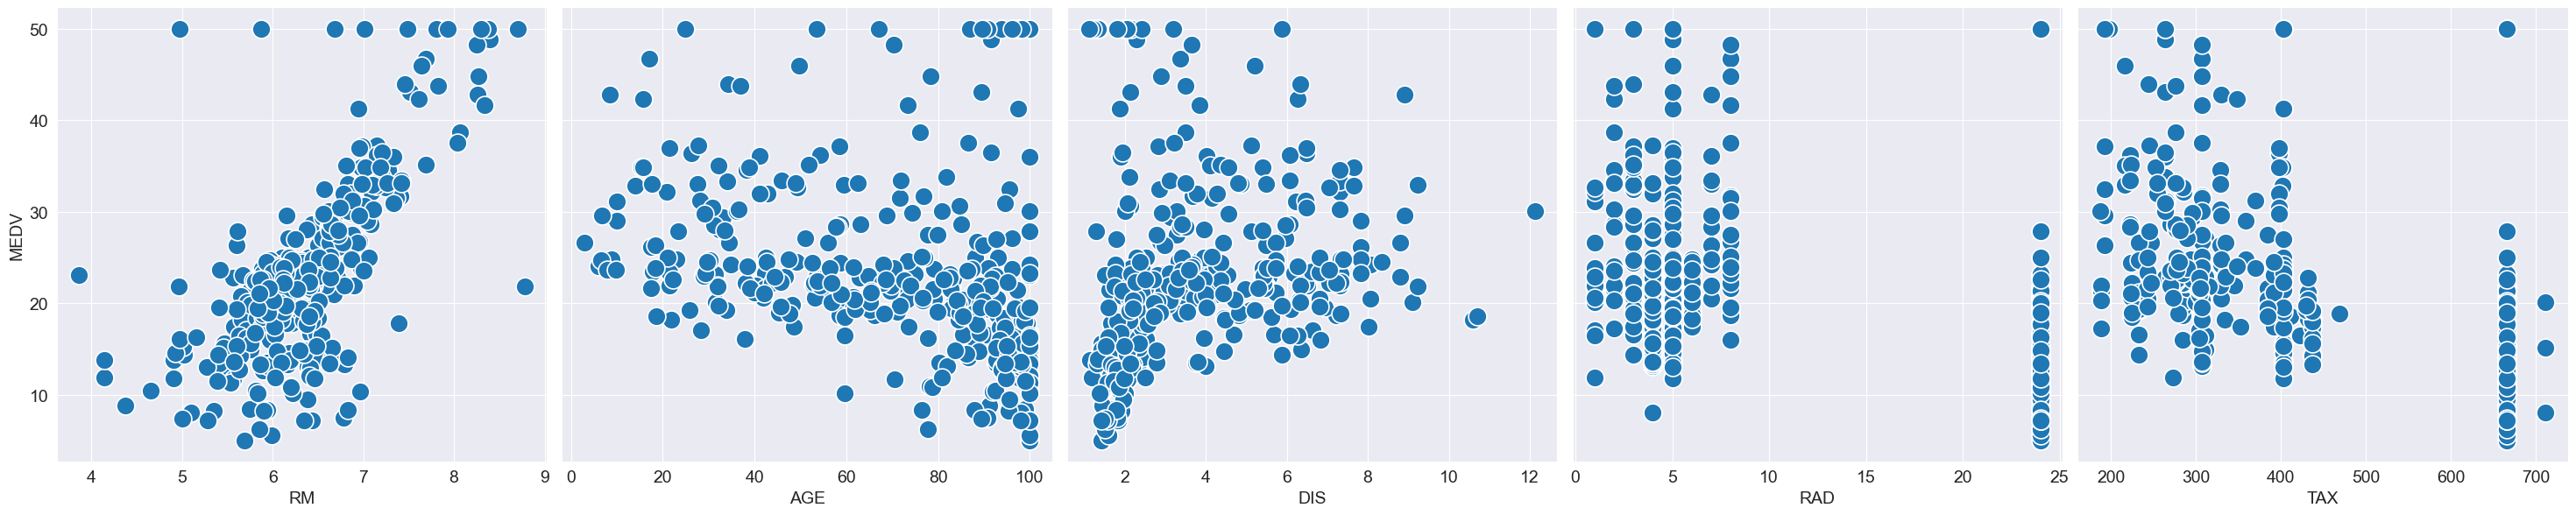

In [11]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = 'MEDV',
            x_vars = list(feat[5:10]),
            height = 6
            )


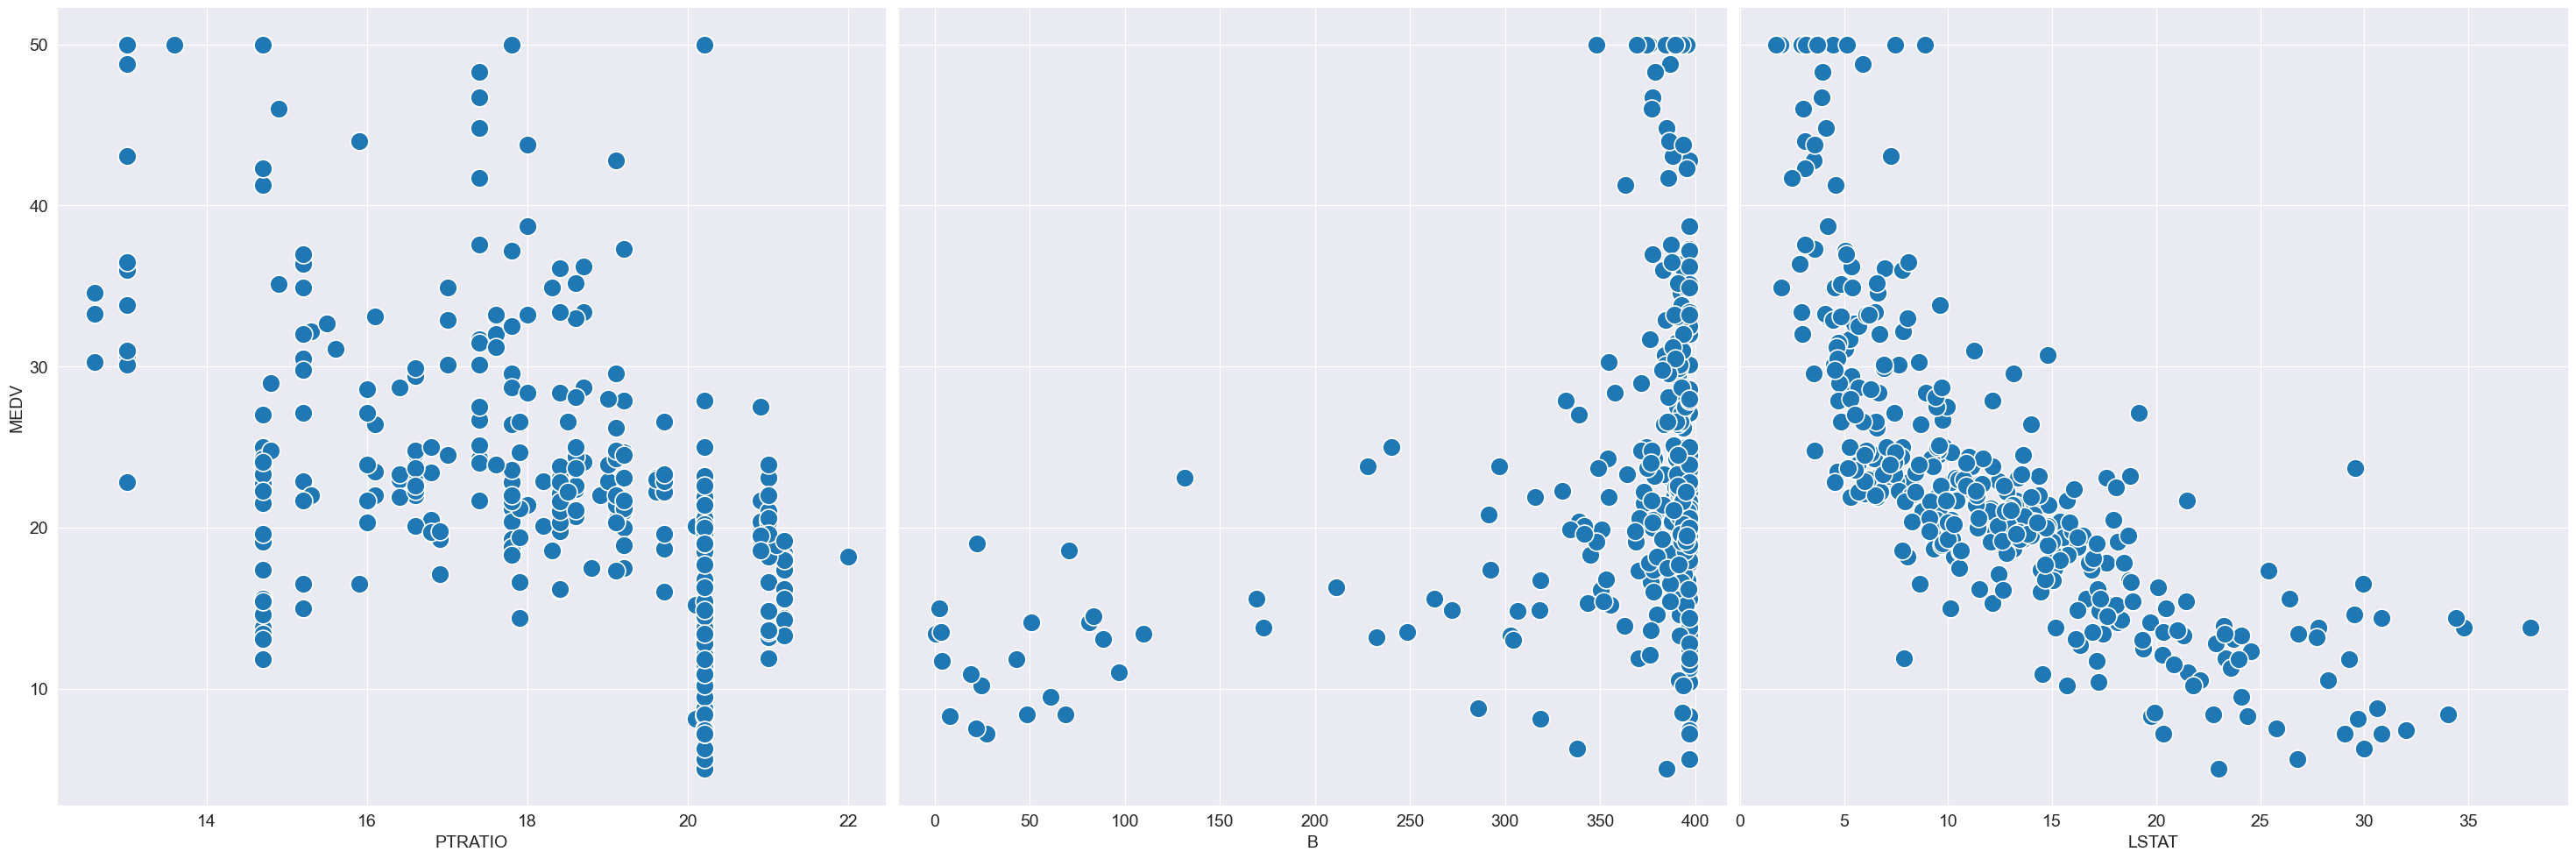

In [12]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = 'MEDV',
            x_vars = list(feat[10:13]),
            height=10
            )


Из графиков видно, что 


In [13]:
def clean_dataset(df_src = pd.DataFrame):
  
    crim_mask = (df_src['CRIM'] > 20) & (df_src['MEDV'] < 15)
   
    indus_mask = (df_src['INDUS'] > 15) & (df_src['MEDV'] > 40) 
    mask_1 = df_src['NOX']>0.8
    mask_2 =df_src['RAD']>20 
    outliers_mask = crim_mask | indus_mask | mask_1 | mask_2
    df_cleaned = df_src[~outliers_mask]
    return df_cleaned
    
df_train_clean_data = clean_dataset(df_train_data)


Обучим модель с очищенными данными

In [14]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

df_train_clean_data = clean_dataset(df_train_data)
x_train= df_train_clean_data.copy()
y_train = x_train.pop('MEDV')

df_test_clean_data = clean_dataset(df_train_data)
x_test = df_test_clean_data.copy()
y_test = x_test.pop('MEDV')

reg_model.fit(x_train, y_train)
y_true = y_test
y_pred = reg_model.predict(x_test)
print(pred_metrics(y_true, y_pred))

{'mse': 7.988092423696604, 'mae': 2.157207744500393, 'rmse': 2.8263213588862475, 'r2': 0.8698666375203785}


r2 стал 0.78 уже неплохо! Попробуем так же проанализировать распределения переменных и сделать их псевдонормальными. Заметим так же, что LSTAT от MEDV имеет квадратичную зависимость. INDUS пхож на "квадрат" и CRIM слишком близко прижат к оси(может быть 4 степень), проэксперементируем в дальнейшем!

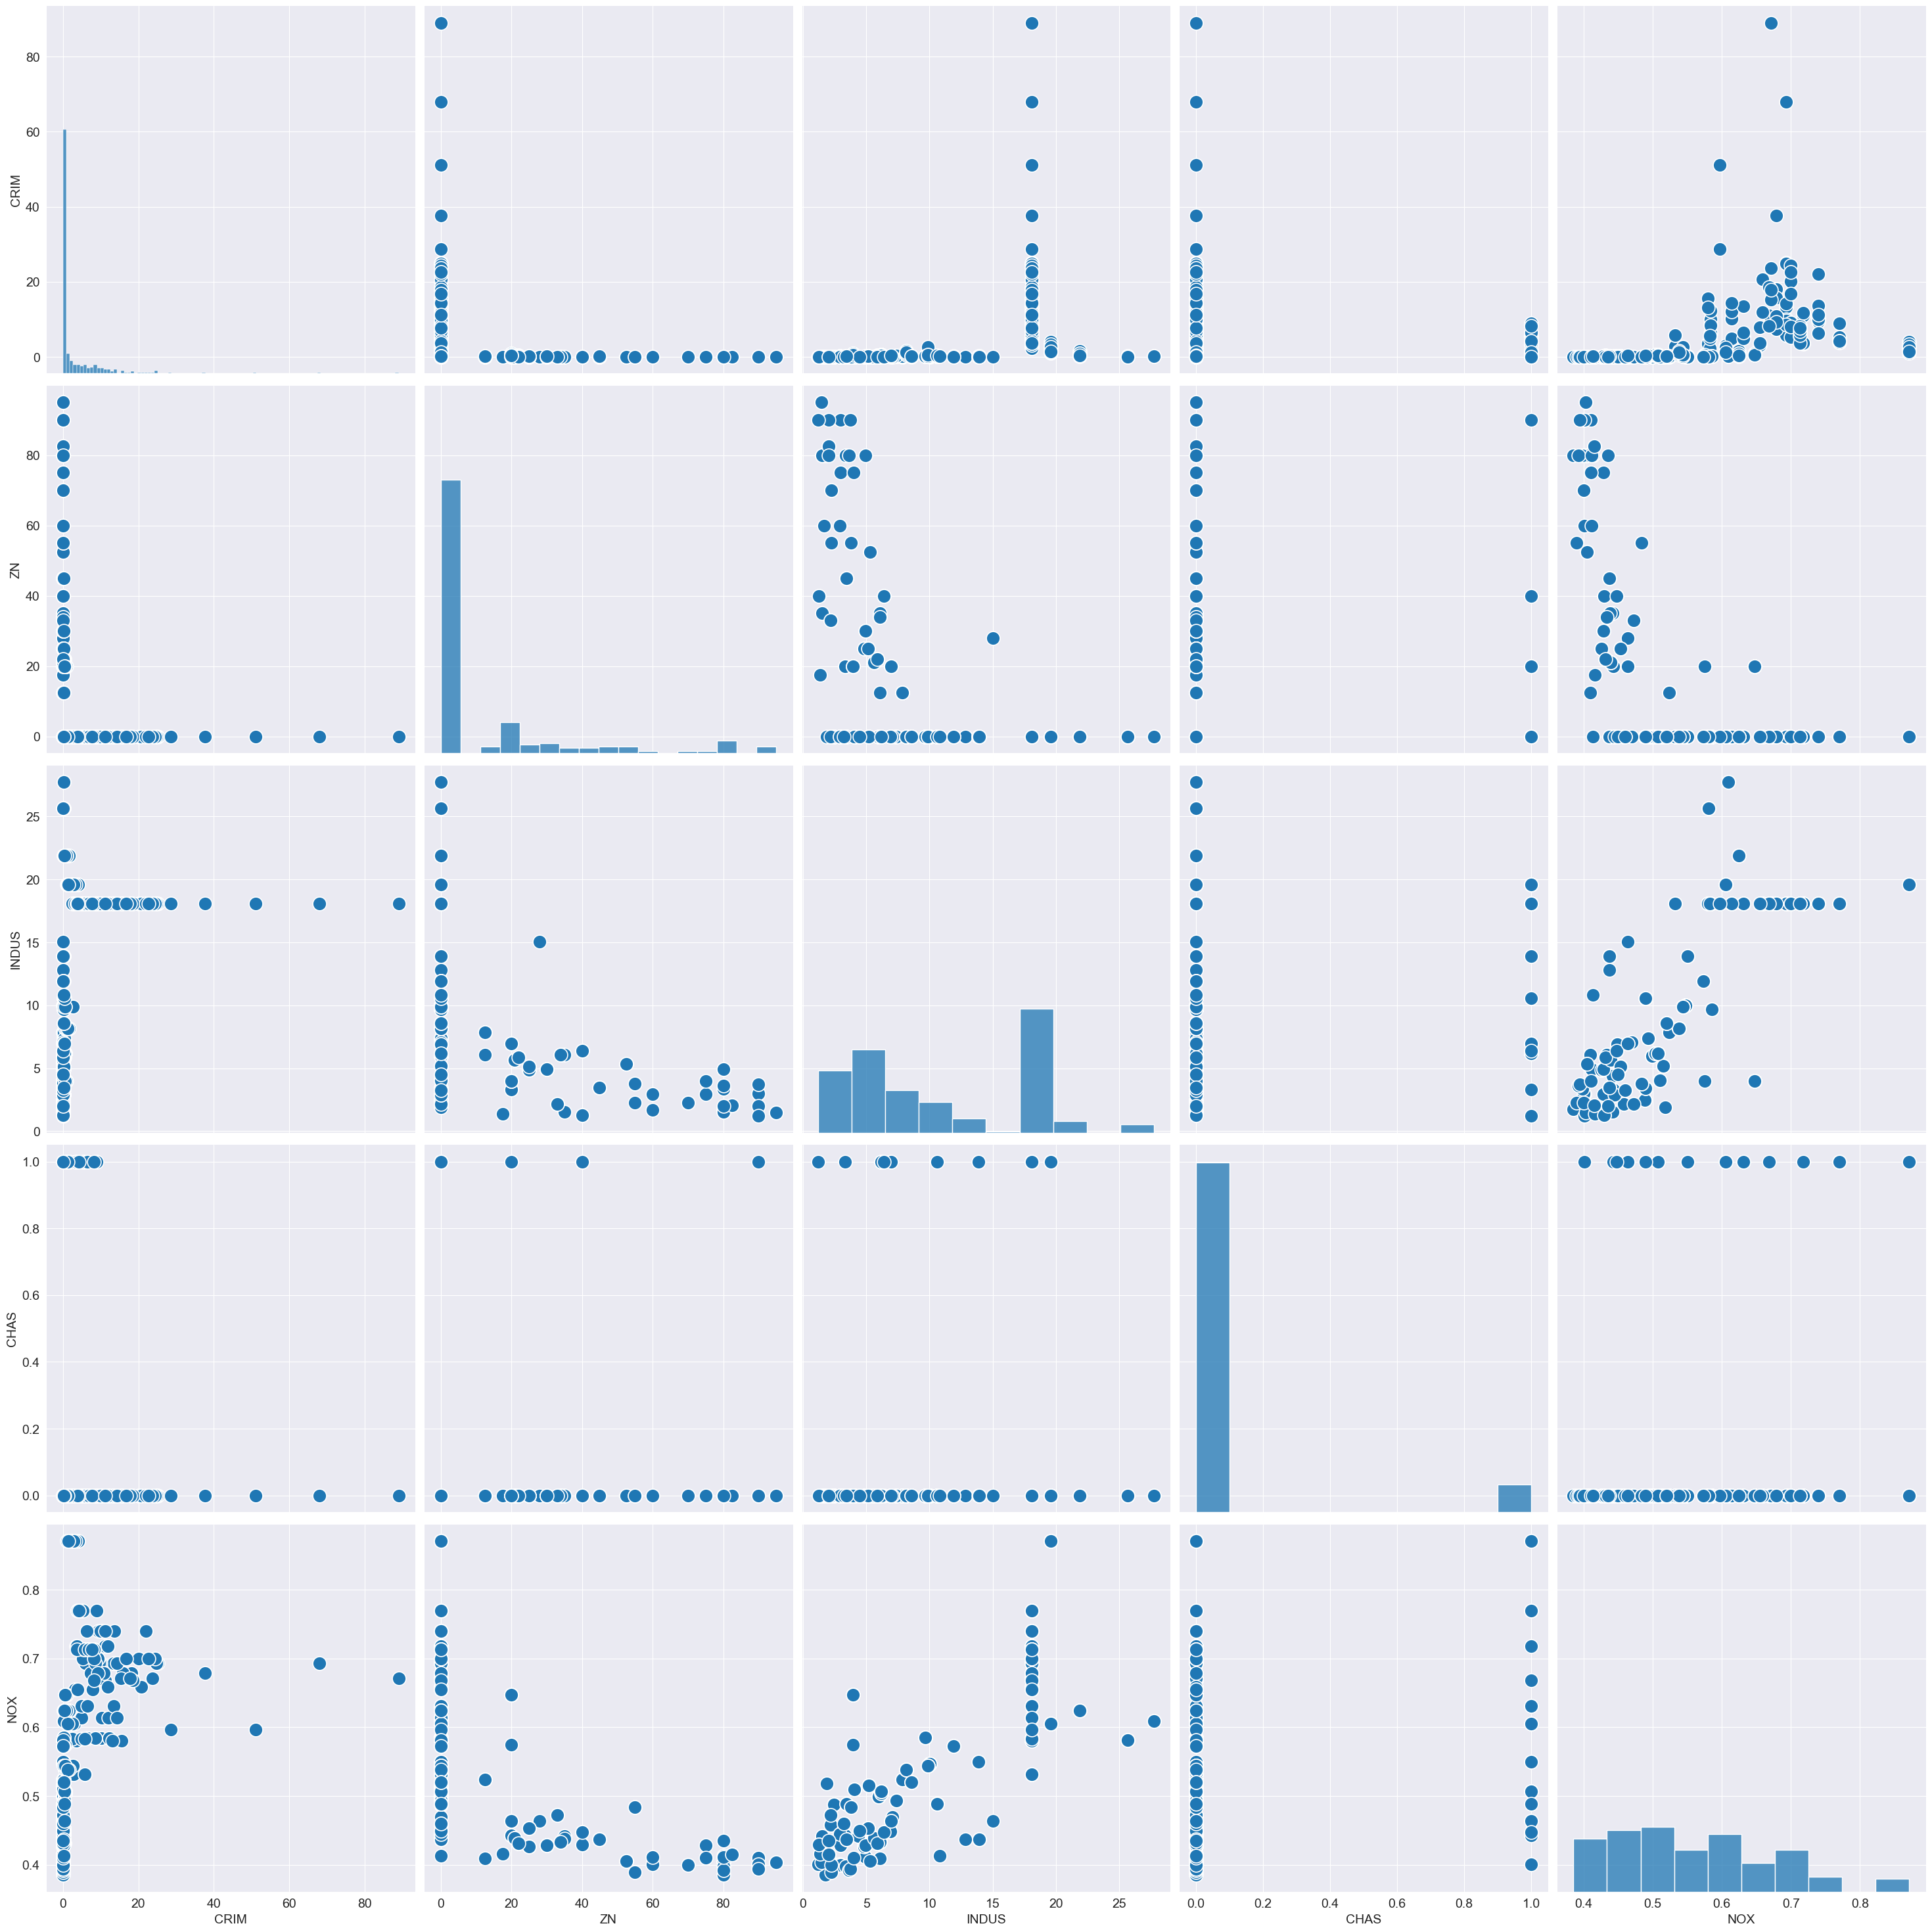

In [15]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = list(feat[0:5]),
            x_vars = list(feat[0:5]),
            height = 6
            )

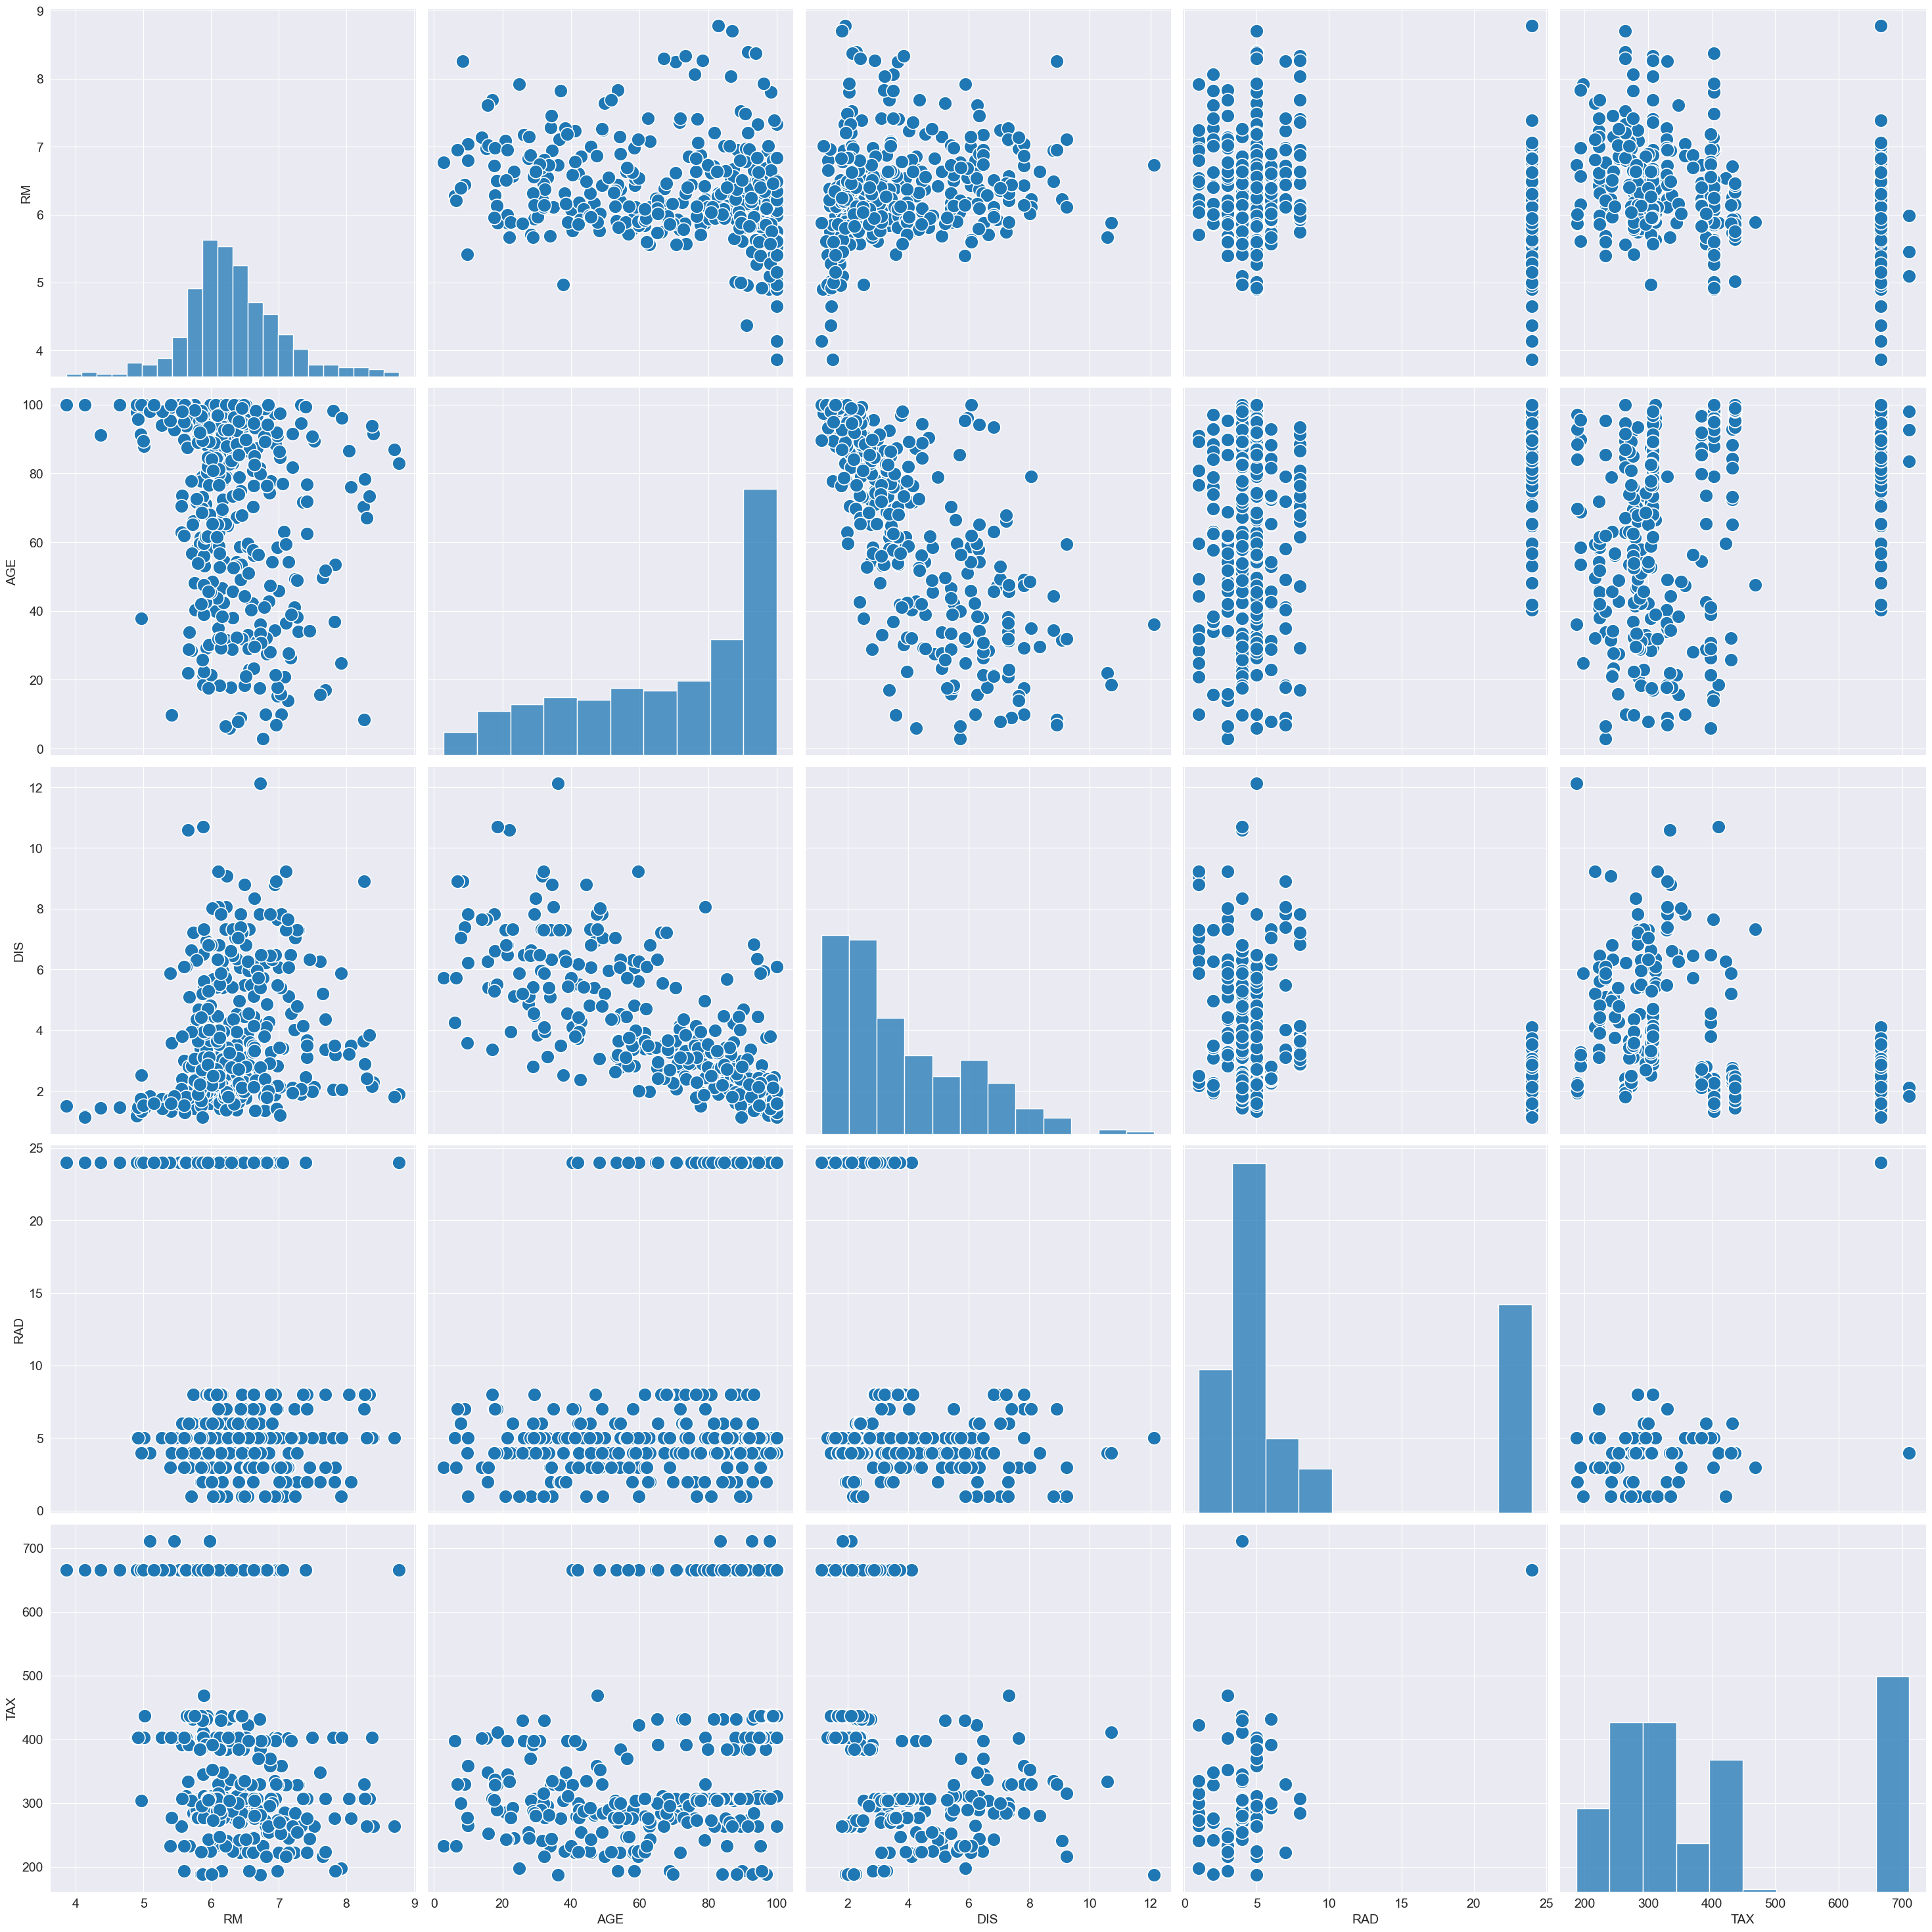

In [16]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = list(feat[5:10]),
            x_vars = list(feat[5:10]),
            height = 6
            )

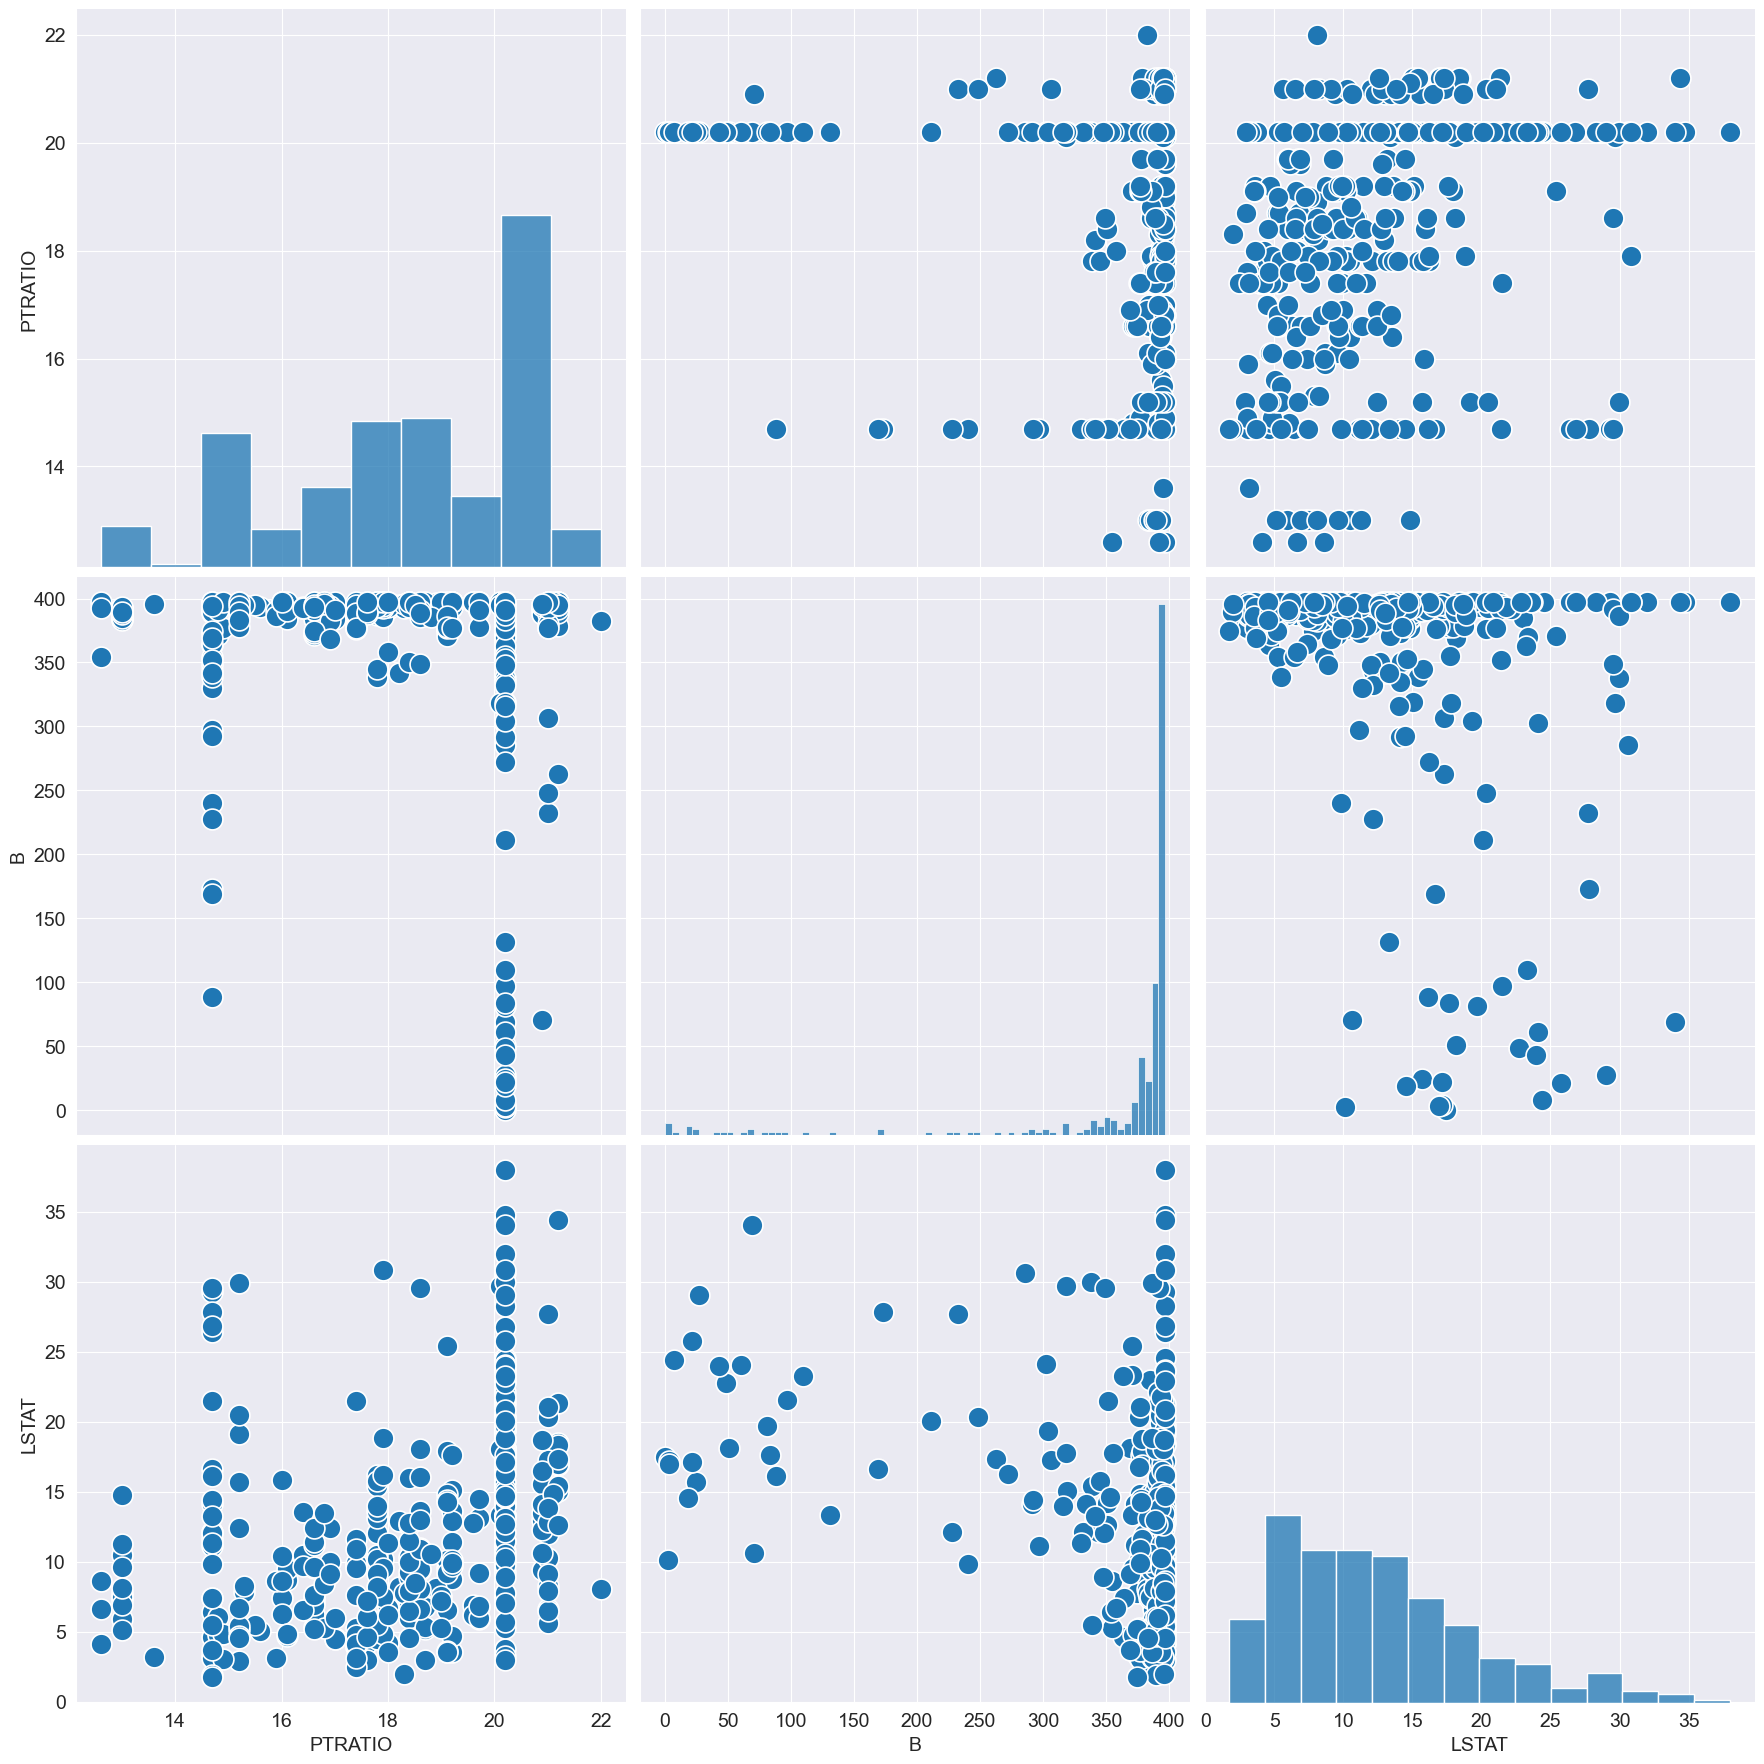

In [17]:
feat = df_train_data.columns
g = sns.pairplot(df_train_data, 
            y_vars = list(feat[10:13]),
            x_vars = list(feat[10:13]),
            height = 6
            )

1. Правый хвост имеют:  CRIM, ZN, DIS, LSTAT
2. Левый хвост имеют: AGE, B

Таким образом мы в препроцессе: LSTAT и INDUS возводим в квадрат. CRIM возводим в четвертую степень
Вместо CRIM, ZN, DIS используем логорифм

In [18]:
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

log_features = ['CRIM', 'DIS']
df_train_clean_data = clean_dataset(df_train_data)
x_train = df_train_clean_data.copy()
y_train = x_train.pop('MEDV')

print(x_train.tail(1))
x_train[log_features] = np.log(x_train[log_features])
x_train['LSTAT_poly_2'] = x_train['LSTAT']**2
print(y_train.tail(1))
reg_model.fit(x_train, y_train)

df_test_clean_data = clean_dataset(df_train_data)
x_test = df_test_clean_data.copy()
x_test[log_features] = np.log(x_test[log_features])
x_test['LSTAT_poly_2'] = x_test['LSTAT']**2
y_test = x_test.pop('MEDV')
y_true = y_test
y_pred = reg_model.predict(x_test)
print(pred_metrics(y_true, y_pred))

        CRIM   ZN  INDUS  CHAS   NOX     RM   AGE     DIS  RAD    TAX  \
102  0.22876  0.0   8.56     0  0.52  6.405  85.4  2.7147    5  384.0   

     PTRATIO     B  LSTAT  
102     20.9  70.8  10.63  
102    18.6
Name: MEDV, dtype: float64
{'mse': 7.514132464244083, 'mae': 2.0572067306740873, 'rmse': 2.7411917963258396, 'r2': 0.8775878805822759}


Обучение модели Лассо

In [19]:
from sklearn import linear_model
mod_Lasso = linear_model.Lasso(alpha=0.00001, random_state=RANDOM_SEED)
mod_Lasso.fit(x_train, y_train)
y_pred = mod_Lasso.predict(x_test)
print(pred_metrics(y_true, y_pred))

{'mse': 7.5141326121599255, 'mae': 2.0571854628463475, 'rmse': 2.741191823306046, 'r2': 0.8775878781725909}


Попробуем про

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from sklearn.linear_model import LinearRegression

reg_model = LinearRegression()

log_features = ['CRIM', 'DIS']
sqr_features = ['LSTAT', 'INDUS']
new_sqrt = ['LSTAT_poly_2', 'INDUS_poly_2']
bisqr_feat = 'CRIM'
df_train_clean_data = clean_dataset(df_train_data)
x_train = df_train_clean_data.copy()
y_train = x_train.pop('MEDV')


x_train[log_features] = np.log(x_train[log_features])
x_train[new_sqrt] = x_train[sqr_features ]**2
x_train['CRIM_4'] = x_train[bisqr_feat]**4
scaler.fit(x_train)
x_train.loc[:, x_train.columns] = scaler.transform(x_train)
reg_model.fit(x_train, y_train)

df_test_clean_data = clean_dataset(df_train_data)
x_test = df_test_clean_data.copy()
x_test[log_features] = np.log(x_test[log_features])
x_test[new_sqrt] = x_test[sqr_features ]**2
x_test['CRIM_4'] = x_test[bisqr_feat]**4
y_test = x_test.pop('MEDV')
scaler.fit(x_test)
x_test.loc[:, x_test.columns] = scaler.transform(x_test)
y_true = y_test
y_pred = reg_model.predict(x_test)
print(pred_metrics(y_true, y_pred))

{'mse': 7.170459652103089, 'mae': 2.042994898139515, 'rmse': 2.6777713965353893, 'r2': 0.8831866263484194}


К сожалению, не получилось увеличить коэффициент r2 после нормирования, но в конечном итоге r2 увеличился с 71 до 87, т.е. на 16%, что тоже неплохо!